# Minimum Volume Ellipsoids

参考
* [Minimum Volume Ellipsoids](https://www.amazon.co.jp/-/en/Michael-J-Todd/dp/1611974372)
* [Determinants and Volumes](https://textbooks.math.gatech.edu/ila/determinants-volumes.html#:~:text=The%20theorem%20on%20determinants%20and,a%20number%20A%20a%20B%20.)

## モチベーション

まず適当な$m$点の凸包をイメージしてみましょう。
例えば$X\in \mathbb{R}^n$を

$$X := \operatorname{conv} \{x_1, x_2, \dots, x_m\}$$

とします。
これは$m$個の線形不等式についての多面体として表記することも可能です：
$$X = \{x\in \mathbb{R}^n: Ax \leq b\}$$

このような多面体$X$上で、適当な線形関数$c^Tx$を最適化することを考えてみましょう。

1. 前者の場合：（確か）線形関数は多面体の頂点でその最大（最小）値を取るため、シンプルに$x_1, \dots, x_m$について$c^Tx_i$を調べれば、最適化できます。
2. 後者の場合：$m$個の不等式についての線型計画法を解けばわかります。

しかし、どちらも$m$について依存した計算量がかかってしまいます。なんとか$n$にだけ依存した計算量に変えられないでしょうか？

一つの候補として、軸にそった直方体を使う方法があります。つまり、$X$を囲むような箱を考えます。
これは良さそうに見えますが、この方法は軸の作り方によってでてくる直方体の形が全然変わってしまい、特定のデータセットをよく表すことができません。
例えば次のように、「データを45度回転させたデータ上の直方体」$\neq$「元のデータの直方体を45度回転させたもの」になってしまいます（アフィン不変性が保証されていません）。

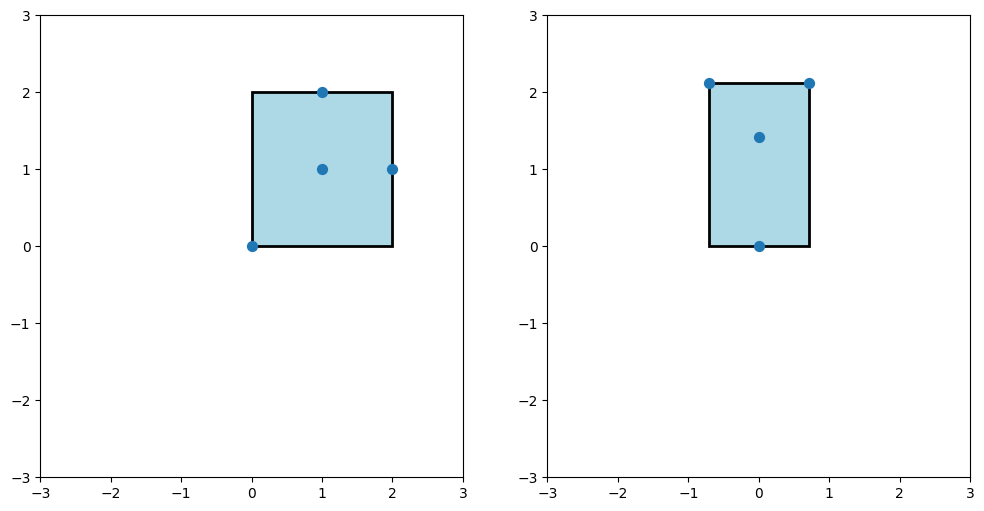

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

# 集合の描画
x = [0, 1, 2, 1]
y = [0, 2, 1, 1]

# minimum volume enclosing box の描画

x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)

verts = [
    (x_min, y_min), # left, bottom
    (x_min, y_max), # left, top
    (x_max, y_max), # right, top
    (x_max, y_min), # right, bottom
    (0, 0), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='lightblue', lw=2)
ax.add_patch(patch)
plt.scatter(x, y, s=50)  # 集合
plt.ylim(-3, 3)
plt.xlim(-3, 3)

ax = fig.add_subplot(122)

# 45度回転させます

R = np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)],
              [np.sin(np.pi / 4),  np.cos(np.pi / 4)]])
x2, y2 = [], []
for _x, _y in zip(x, y):
    v = np.dot(R, np.array([_x, _y]))
    x2.append(v[0])
    y2.append(v[1])
x, y = x2, y2

# minimum volume enclosing box の描画

x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)

verts = [
    (x_min, y_min), # left, bottom
    (x_min, y_max), # left, top
    (x_max, y_max), # right, top
    (x_max, y_min), # right, bottom
    (0, 0), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='lightblue', lw=2)
ax.add_patch(patch)
plt.scatter(x, y, s=50)  # 集合
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()
plt.show()

## 楕円

直方体の代替案として楕円を考えてみましょう。

$$
\mathcal{E}(H, \bar{x}):=\{x\in \mathbb{R}^n : (x-\bar{x})^TH(x-\bar{x}) \leq n\}
$$

ここで、
* $\bar{x}$は楕円の中心
* $H$は$n$次の正則な対称行列です。つまり、$H^T=H$かつ$v^THv > 0$です。

###  楕円の性質

楕円は円をアフィン変換したものと同じです。
楕円について別の解釈をするため、$H$をコレスキー分解してみます。つまり、$H=L^TL$となる下三角行列$L$で分解します（これが正則行列に対して存在することは帰納的に示せます）。
よって、$\|L^T(x-\bar{x})\|\leq \sqrt{n}$として楕円を表すこともできます。つまり、

$$
\mathcal{E}(H, \bar{x})=\{x=\bar{x} + (\sqrt{n}L^{-T})z : z\in \mathbb{R}^{n}, \|z\|\leq 1\}
$$

これは$\bar{x}$を中心とした半径$1$の円が$\sqrt{n}L^{-T}$によってアフィン変換されていることを表しています。
また、楕円は下三角行列の$n(n+1)/2$個の要素で表せることもわかります。

さらに、このような楕円ではアフィン不変性が保証されることに注意しましょう。（教科書参照）

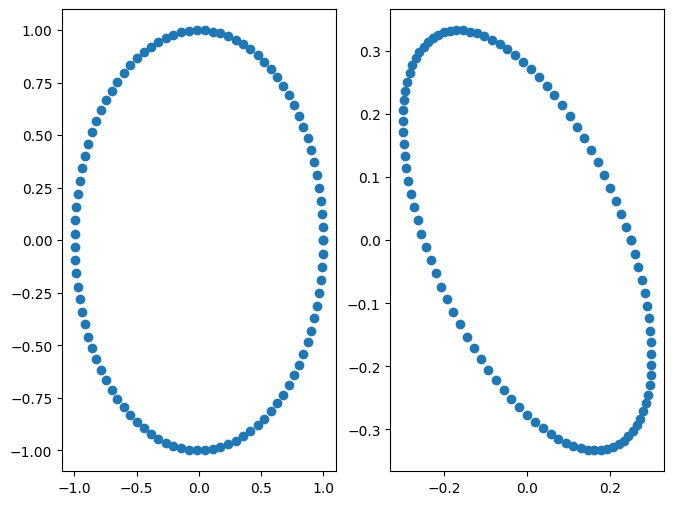

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

fig = plt.figure(figsize=(12, 6))

# 円の描画
ax = fig.add_subplot(131)
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.scatter(x, y)


# 楕円の描画
ax = fig.add_subplot(132)
L = np.array([[4, 0],
              [2, 3]])
L_T = np.linalg.inv(L).T
x2, y2 = [], []
for _x, _y in zip(x, y):
    v = np.dot(L_T, np.array([_x, _y]))
    x2.append(v[0])
    y2.append(v[1])
plt.scatter(x2, y2)


# 楕円の条件のチェック
# x.T H x == 1.0
H = L @ L.T
for _x, _y in zip(x2, y2):
    np.testing.assert_almost_equal(np.array([_x, _y]).T @ H @ np.array([_x, _y]), 1.0)

また、このような楕円を考えると、楕円の中の線形最適化問題はすぐに解くことができます。


$$
\begin{aligned}
&\min_x c^T x\\
& (x - \bar{x})^T H (x - \bar{x}) \leq n
\end{aligned}
$$

については、KKT条件から最適解$x$は$c+2\lambda H (x - \bar{x})=0$を$\lambda \geq 0$で満たします。
よって、

* 最適解：$x = \bar{x} - \sqrt{\frac{n}{c^T H^{-1}c}}H^{-1}c$
* 最小値：$c^T \bar{x} - \sqrt{nc^TH^{-1}c}$

です。

さらに、

* $\mathcal{E}_*(X)$を「$X$を内包する最小の楕円」
* 楕円の中心からの相似スケール：$\alpha \mathcal{E}:= \{\bar{x} + \alpha z : \bar{x} + z \in \mathcal{E}\}$ 

とします。このとき、$\mathbb{R}^n$内の凸体（内部が空ではないコンパクトな凸集合です）について、次が成立します。

1. 相似スケール$\frac{1}{n}\mathcal{E}_*(X)$は$X$の内部にある
2. $-X=X$なら、$\frac{1}{\sqrt{n}}\mathcal{E}_*(X)$は$X$の内部にある

つまり、最小楕円は凸体を中から抑える場合でも$n$しか小さくしなくて良いため、凸体を表現するのに向いているわけですね。
また、このスケールはtightになっています。
詳細は教科書2.4章を参照してください。

## 最小楕円の見つけ方

表記
* $S^k$：実数の$k\times k$の対称行列の空間
* $S^k_+$：$S_k$のうち、positive semidefiniteな行列によるCone
* $S^k_+$：$S_k$のうち、positive definiteな行列によるCone
* $Y \prec Z$：$Y - X$がPositive definite

上で述べたように、「楕円はCholesky行列$\sqrt{n}L^{-T}$を使って変形された円」とみなすことができます。
よって、楕円の体積は

$$\text{円の体積 } \times |\det (\sqrt{n}L^{-T})|$$

であることがわかります（$M$でアフィン変換されると集合の体積は$|\det M|$倍されます。詳しくは[Determinants and Volumes](https://textbooks.math.gatech.edu/ila/determinants-volumes.html#:~:text=The%20theorem%20on%20determinants%20and,a%20number%20A%20a%20B%20.)を参照したください）。

このことから、

$$
\operatorname{vol} (\mathcal{E}(H, \bar{x}))\frac{n^{n/2}\Omega_n}{\sqrt{\det H}}
$$

です。ここで、$\Omega_n$は$\mathbb{R}^n$での半径１の球の体積です。
よって、Ellipsoidの体積を小さくするには、$-\ln \det H$を小さくすれば良いことがわかります（$\ln \det H$は$H$が正則出ないならば$-\infty$とします。）

つまり、$x_1, x_2, \dots, x_m$を含む最小楕円を見つけるためには、次の最適化問題をとけば良いことがわかります。

$$
\begin{aligned}
\text{ 主問題 }\;  &\min_{H\in S^n} f(H) := -\ln \det (H)\\
&x_i^T H x_i \leq n
\end{aligned}
$$

ここで、データは中心が$0$であることを仮定しましたが、これは一般性を失いません（2.3章を参照してください）。
また、$x_i$は$\mathbb{R}^n$を張ることを仮定します。つまり、$X$はfull row rankとします（こうしないと楕円の体積が０になります）。

このとき、ラグランジュの未定定数法を考えてみましょう。それぞれの制約についての未定定数を$u_i$とすると、ラグランジアンは

$$
L(H, u):= -\ln \det (H) + \sum_i u_i(x_i^T H x_i - n)
$$
です。ここで、$u\in \mathbb{R}^m$、$U:= Diag(u) \in S^m$とすると、ラグランジアンは

$$
L(H, u):= -\ln \det (H) + \operatorname{Tr}[H^T(XU X^T)]- ne^T u
$$

であり、$\nabla_H L(H, u)=-H^{-1} + XUX^T$です。よって最適な$H$は

$$\bar{H}=(XUX^T)^{-1}$$

になります。これは$XUX^T$がpositive definiteなときだけしか適用できませんが、semidefiniteなときでもなんとかなります（教科書p.12参照）。

また、最小値は

$$
\min_H L(H, u)=\ln \det (XUX^T) + n - ne^T u
$$

になります。
よって、双対問題はこの右辺を最大化させる問題なので、

$$
\begin{aligned}
\text{ 双対問題 }\; &\max_{u\in \mathbb{R}^m} \ln \det (XUX^T) \\
& e^T u = 1, \\
& u \geq 0
\end{aligned}
$$

を考えても同じ解が得られます。（$e^Tu$の制約はこっそり追加しました。詳細は教科書p.12を参考にしてください。）
また、最適解の$H$や$u$が満たす条件は教科書2.2賞を参照してください。

この双対問題はD-最適計画問題と呼ばれます（線形回帰の分散を最小にするような実験計画問題と等価です。教科書1.3章参照）。

教科書2.3章（中心がずれた場合の最小楕円問題）を参考に、最小楕円を描画してみましょう。


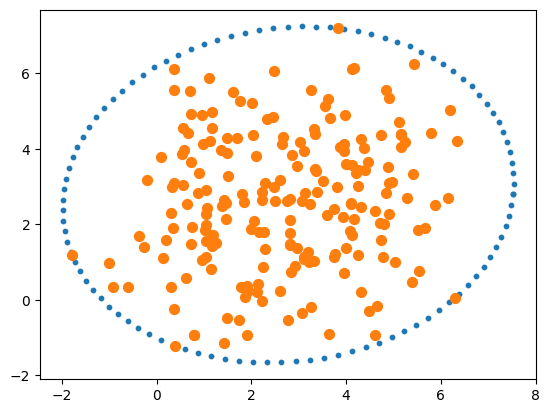

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import minimize

m = 200
Y = np.random.randn(2, m) + np.random.rand(2, m) * 5
X = np.vstack((Y, np.array([1,] * m)))  # 中心を計算する用
n = 2 + 1

# minimum volume ellipsoidの計算
# 双対問題を解きます
def dual_fn(u):
    x = X @ np.diag(u) @ X.T
    return -np.log(np.linalg.det(x))

u0 = np.ones(m) / m
cons = (
    {"type": "eq", "fun": lambda u: u.sum() - 1}
)
bnds = [(0, None)] * m  # u >= 0
res = minimize(dual_fn, x0=u0, constraints=cons, bounds=bnds, method="SLSQP")
u = res.x
H = np.linalg.inv(X @ np.diag(u) @ X.T)
H = H[:-1, :-1]
L = np.linalg.cholesky(H)
y_ = Y @ u

# 楕円の描画
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
L_T = np.linalg.inv(L).T
x2, y2 = [], []
for _x, _y in zip(x, y):
    v = y_ + np.sqrt(2) * np.dot(L_T, np.array([_x, _y]))
    x2.append(v[0])
    y2.append(v[1])
plt.scatter(x2, y2, s=10)

# データの描画
x, y = Y
plt.scatter(x, y, s=50)

いい感じですね！
今回は最小楕円問題をscipy.optimizeで解きましたが、もっと効率がいい方法を見てみましょう。

## 最適解の性質

主問題と双対問題の関係を踏まえると、最適解が満たすべき性質が見えてきます。
まずは主問題と双対問題の関係を確認してみましょう。

---

**主問題と双対問題の関係**

$H$と$u$がそれぞれ主問題と双対問題について実行可能であるとき、

$$f(H)\geq g(u)$$

が成立します。証明しましょう。
まず、変形して

$$
\begin{aligned}
f(H) - g(u) 
&= -\ln \det(H) - \ln\det(XUX^T)\\
&= -\ln \det(HXUX^T)\\
&= -\ln (\prod_j \lambda_j)\\
&= -n\ln \left(\prod_j \lambda_j\right)^{1/n}\\
&\geq -n\ln \left(\sum_j \lambda_j / n\right)
\end{aligned}
$$

です。ここで、$\lambda_j$は$HXUX^T$の固有値であり、最後の不等式では算術平均と幾何平均の関係を使いました。この固有値について、

$$
\operatorname{Trace}\left[HX\left(\sum_i u_i e_i e_i^T X^T\right)\right]
= \sum_i u_i x_i^T H x_i\leq n e^T u=n
$$

が成り立ちます。上の不等式ではラグランジアンが最小化されるとき、$H=(XUX^T)^{-1}$であることを使っています。

このことから、$HXUX^T$の固有値の和は最大でも$n$であることがわかります。よって、
$$
f(H) - g(u) 
\geq -n\ln \left(\sum_j \lambda_j / n\right)
\geq -n \ln (n / n) = 0
$$
が成立します。

証明は省略しますが、$H$と$u$はそれぞれ唯一の最適解を持ち、それは$f(H)=g(u)$を満たします。

---

続いて最適解が満たす条件を確認します。

---

**最適解の必要十分条件**

主問題の解$H$と双対問題の解$u$がそれぞれ最適である必要十分条件は次である。

1. 実行可能性：$i=1,\dots, m$について、$e^T u=1\quad, u \geq 0, \quad x_i^T H x_i\leq n$
2. $H=(XUX^T)^{-1}$
3. $i=1,\dots, m$について$u_i>0$ならば$x_i^T H x_i=n$

これは最適解が$f(H)=g(u)$を満たすことや、主問題と双対問題の関係の不等式を確認すれば出てきます。

---

最後に近似最適な解について述べておきます。

---

**近似最適解**

* 実行可能解$u$は次を満たすとき$\varepsilon$-主実行可能であると言う。
    * $H(u):=(XU^TX)^{-1}$が $x_i^T H(u)x_i \leq (1 + \varepsilon) n, \quad i=1,\dots, m$ を満たす。
* 実行可能解$u$が$\varepsilon$-主実行可能かつ次を満たすとき$\varepsilon$-最適であると言う。
    * $x_i^T H(u)x_i \geq (1 - \varepsilon) n, \quad \text{ if } u_i > 0, \quad i=1,\dots, m$ を満たす。
    * つまり、$(1 - \varepsilon) n \leq x_i^T H(u)x_i \leq (1 + \varepsilon) n$ です。
* $u$が実行可能で、$u$の目的関数が最適なものから$\delta$以内であるとき、その$u$は$\delta$-以内最適解であると言う。

以上の定義を踏まえて、近似最適解について以下のことが言えます。


**近似最適解の性質**

* $u$が$\varepsilon$-主実行可能解（もしくは$\varepsilon$-最適解）であるとき、$u$は双対問題について$n\ln (1+\varepsilon)$-以内最適な解であり、$(1+\varepsilon)^{-1}H(u)$は主問題について$n\ln (1+\varepsilon)$-以内最適な解である。
* また、$\mathcal{E}((1+\varepsilon)^{-1}H(u))$は全ての$x_i$を含み、かつ最小楕円の$(1+\varepsilon)^{n/2}$倍以内の楕円である。

証明してみましょう。まず主実行可能解の定義より、$u$と$(1+\varepsilon)^{-1}H(u)$は実行可能解です。また、$H(u)$の定義より、

$$
f((1+\varepsilon)^{-1}H(u)) - g(u) = n\ln (1+\varepsilon) + f(H(u)) - g(u) = n\ln (1+\varepsilon) \leq n\varepsilon
$$

になります。最適解は$f(H^*) - g(u^*)=0$であることから、１つ目が成立します。
２つ目は主実行可能の定義と[Determinants and Volumes](https://textbooks.math.gatech.edu/ila/determinants-volumes.html#:~:text=The%20theorem%20on%20determinants%20and,a%20number%20A%20a%20B%20.)から直ちに成立します。

---